In [1]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### EDA

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

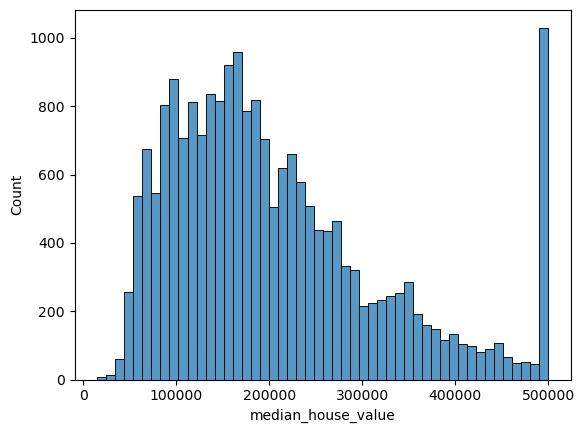

In [4]:
sns.histplot(data.median_house_value, bins=50)

In [5]:
#data.median_house_value = np.log1p(data.median_house_value)

In [6]:
#sns.histplot(data.median_house_value, bins=50)

The median_house_value for this dataset does not have a long tail.

In [7]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_house_value']

In [9]:
data[features]

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,342200.0
...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,84700.0


#### Question 1
Find a feature with missing values. How many missing values does it have?

In [10]:
data[features].isnull().sum().sort_values(ascending = False)

total_bedrooms        207
latitude                0
longitude               0
housing_median_age      0
total_rooms             0
population              0
households              0
median_house_value      0
dtype: int64

'total_bedrooms' is the only feature with missing values and the missing values total to 207.

#### Question 2
What's the median (50% percentile) for variable 'population'?

In [11]:
data.population.median()

1166.0

#### Split the data

##### Shuffle the initial dataset, use seed 42.

In [12]:
n = len(data)

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

#data.random.shuffle()

##### Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [13]:
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [14]:
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

n_train, n_val, n_test 

(12384, 4128, 4128)

In [15]:
X_train = data.iloc[idx[:n_train]]
X_val = data.iloc[idx[n_train : n_train + n_val]]
X_test = data.iloc[idx[n_train + n_val:]]

##### Make sure that the target value ('median_house_value') is not in your dataframe.

In [16]:
new_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']

In [17]:
X_train = data[new_features].iloc[idx[:n_train]]
X_val = data[new_features].iloc[idx[n_train : n_train + n_val]]
X_test = data[new_features].iloc[idx[n_train + n_val:]]

##### Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [18]:
y_train = np.log1p(data['median_house_value'].iloc[idx[:n_train]])
y_val = np.log1p(data['median_house_value'].iloc[idx[n_train : n_train + n_val]])
y_test = np.log1p(data['median_house_value'].iloc[idx[n_train + n_val:]])

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

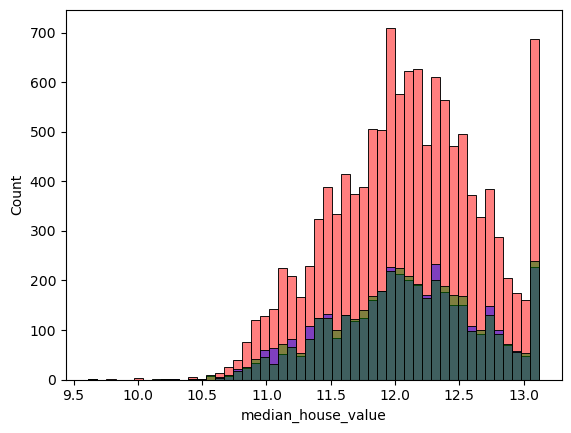

In [19]:
sns.histplot(y_train,alpha = 0.5, color = 'red', bins = 50)
sns.histplot(y_val,alpha = 0.5, color = 'blue', bins = 50)
sns.histplot(y_test,alpha = 0.5, color = 'green', bins = 50)

#### Question 3
* We need to deal with missing values for the column from Q1. 
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)

* Which option gives better RMSE?

Options:

* With 0
* With mean
* Both are equally good

In [20]:
X_train.total_bedrooms.describe()

count    12177.000000
mean       533.480332
std        422.223754
min          2.000000
25%        295.000000
50%        431.000000
75%        641.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

<AxesSubplot:xlabel='total_bedrooms'>

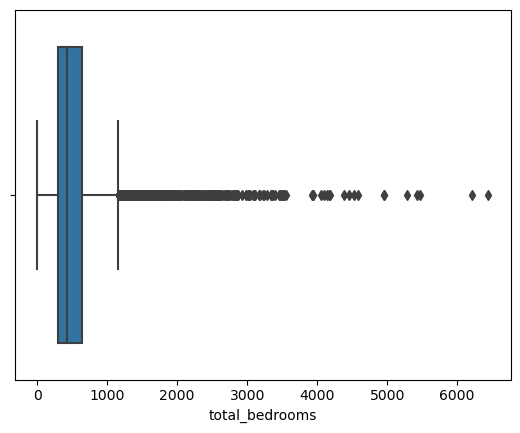

In [21]:
sns.boxplot(x = X_train.total_bedrooms)

###### Option 1:
Fill missing nan values corresponding to 'total_bedrooms' column with 0

In [22]:
X_train_0 = X_train.copy()
X_train_0['total_bedrooms'] = X_train_0['total_bedrooms'].fillna(0)
X_train_0.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

###### Option 2:
Fill missing nan values corresponding to 'total_bedrooms' column with median

In [23]:
X_train_median = X_train.copy()
X_train_median['total_bedrooms'] = X_train_median['total_bedrooms'].fillna(0)
X_train_median.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [24]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [25]:
oceanProximity = X_train.ocean_proximity.unique()
oceanProximity

array(['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [26]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    for v in oceanProximity:
        feature = 'ocean_prox_%s' % v
        df[feature] = (df['ocean_proximity'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [27]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [28]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse).round(2)

###### Model Evaluation using Option 1:

In [29]:
Xtrain = prepare_X(X_train_0)
w_0, w = train_linear_regression(Xtrain, y_train)

y_pred = w_0 + Xtrain.dot(w)
print('train:', rmse(y_train, y_pred))

Xval = prepare_X(X_val)
y_pred = w_0 + Xval.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 66.0
validation: 69.37


###### Model Evaluation using Option 2:
Fill missing nan values corresponding to 'total_bedrooms' column with median

In [30]:
Xtrain = prepare_X(X_train_median)
w_0, w = train_linear_regression(Xtrain, y_train)

y_pred = w_0 + Xtrain.dot(w)
print('train:', rmse(y_train, y_pred))

Xval = prepare_X(X_val)
y_pred = w_0 + Xval.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 66.0
validation: 69.37


Model evaluation using both options, ie. using the zero and median to fill nan values gives same result. This is because the percentage of missing values in comparison to the total instances is negiligible.

#### Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

Options:

* 0
* 0.000001
* 0.001
* 0.0001

In [31]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [32]:
X_train = prepare_X(X_train_0)
X_val = prepare_X(X_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 69.37
 1e-06 0.32
0.0001 0.32
 0.001 0.32
  0.01 0.32
   0.1 0.32
     1 0.32
     5 0.32
    10 0.32


We can see that apart from r = 0, rest of the r values give the same rmse. Hence the smallest r value of r = 0.000001 is chosen as the answer

##### Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

* 0.16
* 0.00005
* 0.005
* 0.15555

In [33]:
# Split the data
n = len(data)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

idx = np.arange(n)

base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

oceanProximity = data.ocean_proximity.unique()

rmse_seed = []

for seed in np.arange(9):
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = data[new_features].iloc[idx[:n_train]]
    df_val = data[new_features].iloc[idx[n_train : n_train + n_val]]
    df_test = data[new_features].iloc[idx[n_train + n_val:]]
    
    y_train = np.log1p(data['median_house_value'].iloc[idx[:n_train]])
    y_val = np.log1p(data['median_house_value'].iloc[idx[n_train : n_train + n_val]])
    y_test = np.log1p(data['median_house_value'].iloc[idx[n_train + n_val:]])
    
    df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(0)
    
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train )
    
    y_pred = w_0 + X_train.dot(w)
    #print('train:', rmse(y_train, y_pred))
    
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    #print('%validation:', rmse(y_val, y_pred))
    
    rmse_seed.append(rmse(y_val, y_pred))

In [34]:
rmse_seed

[23.73, 30.21, 114.9, 92.52, 27.78, 82.68, 184.96, 32.2, 60.94]

In [35]:
std = np.std(rmse_seed)
std

50.41303160449247

The standard deviation of all scores is 50.41303160449247

In [36]:
result = round(std, 3)

In [37]:
result

50.413

The standard deviation of all scores  rounded to 3 decimals is 50.413

##### Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 0.35
* 0.135
* 0.450
* 0.245

In [38]:
# Split the data
n = len(data)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

idx = np.arange(n)

base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

oceanProximity = data.ocean_proximity.unique()


np.random.seed(9)
np.random.shuffle(idx)

df_train = data[new_features].iloc[idx[:n_train]]
df_val = data[new_features].iloc[idx[n_train : n_train + n_val]]
df_test = data[new_features].iloc[idx[n_train + n_val:]]

y_train = np.log1p(data['median_house_value'].iloc[idx[:n_train]])
y_val = np.log1p(data['median_house_value'].iloc[idx[n_train : n_train + n_val]])
y_test = np.log1p(data['median_house_value'].iloc[idx[n_train + n_val:]])

df_combined = df_train.append(df_val)
y_combined = y_train.append(y_val)#


df_combined['total_bedrooms'] = df_combined['total_bedrooms'].fillna(0)

C:\Users\dell\AppData\Local\Temp\ipykernel_12368\618492495.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_train.append(df_val)
C:\Users\dell\AppData\Local\Temp\ipykernel_12368\618492495.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_combined = y_train.append(y_val)#


In [39]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [40]:
X_train = prepare_X(df_combined)
w_0, w = train_linear_regression(X_train, y_combined )

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_combined, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('%validation:', rmse(y_test, y_pred))


train: 90.81
%validation: 91.51
